### 岭回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)
x = np.random.uniform(-3.,3.,size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

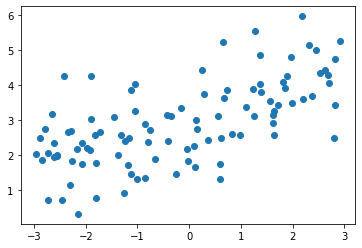

In [6]:
plt.scatter(x,y)
plt.show()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree = degree)),
        ('std_scaler',StandardScaler()),
        ('lin_reg',LinearRegression())
    ])

In [9]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [10]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train,y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test,y_poly_predict)

167.94010871138653

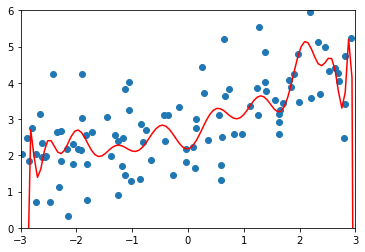

In [22]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,0,6])
plt.show()

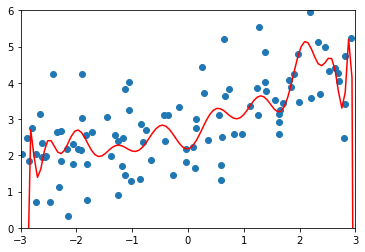

In [24]:
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)

    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,6])
    plt.show()
plot_model(poly_reg)

### 使用岭回归

In [26]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree = degree)),
        ('std_scaler',StandardScaler()),
        ('ridge_reg',Ridge(alpha=alpha))
    ])

In [29]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train,y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.3233492754165332

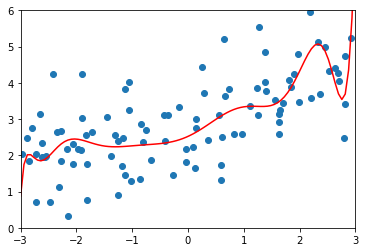

In [31]:
plot_model(ridge1_reg)

In [33]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train,y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

1.1888759304218435

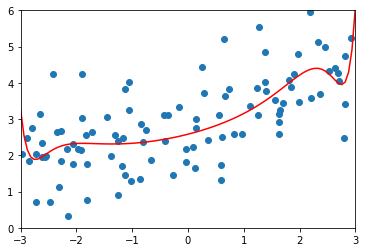

In [35]:
plot_model(ridge2_reg)

In [36]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train,y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test,y3_predict)

1.3196456113086197

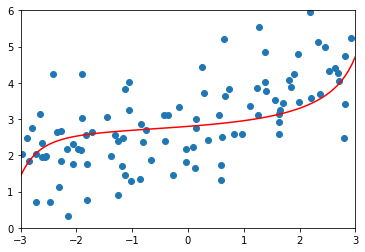

In [38]:
plot_model(ridge3_reg)

In [40]:
ridge4_reg = RidgeRegression(20, 1e10)
ridge4_reg.fit(X_train,y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test,y4_predict)

1.840893917540065

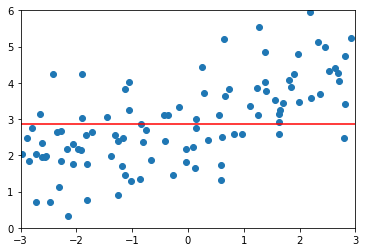

In [41]:
plot_model(ridge4_reg)